In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from scipy.sparse import dia_matrix
import pandas as pd
from qutip import *
import os
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
from functions import*


raw_data = np.loadtxt('mp-19426_CaWO4.xyz', dtype = str) # Tungsten atom positions in Amstrongs
elements = raw_data[:, 0]                     # strings, shape (N,)
pos = raw_data[:, 1:].astype(float)           # floats, shape (N,3)
Crystal_atoms = np.empty(len(elements), dtype=[("el", "U8"), ("xyz", float, (3,))])
Crystal_atoms["el"] = elements
Crystal_atoms["xyz"] = pos
Crystal_atoms["xyz"] -= np.array([2.667267, 2.667267, 0.000000]) # center at Er3+

W_pos = np.loadtxt('positions_ErW_CaWO4.txt') * 1e-10 # Tungsten atom positions in Amstrongs
W_atomes = Crystal_atoms[Crystal_atoms["el"] == "W"]
W_pos

array([[ 3.70729014e-10, -2.62145000e-10, -2.62145000e-10,
         0.00000000e+00],
       [ 3.70729014e-10, -2.62145000e-10,  2.62145000e-10,
         0.00000000e+00],
       [ 3.70729014e-10,  2.62145000e-10, -2.62145000e-10,
         0.00000000e+00],
       ...,
       [ 2.49262643e-09,  1.31072500e-09,  1.57287000e-09,
        -1.42171250e-09],
       [ 2.49262643e-09,  1.57287000e-09, -1.31072500e-09,
         1.42171250e-09],
       [ 2.49262643e-09,  1.57287000e-09,  1.31072500e-09,
         1.42171250e-09]], shape=(832, 4))

In [20]:
W_atomes

array([('W', [-2.667267,  0.      ,  2.877477]),
       ('W', [ 2.667267,  0.      ,  2.877477]),
       ('W', [-2.667267, -2.667267,  0.      ]),
       ('W', [-2.667267, -2.667267, 11.50991 ]),
       ('W', [-2.667267,  2.667267,  0.      ]),
       ('W', [-2.667267,  2.667267, 11.50991 ]),
       ('W', [ 2.667267, -2.667267,  0.      ]),
       ('W', [ 2.667267, -2.667267, 11.50991 ]),
       ('W', [ 2.667267,  2.667267,  0.      ]),
       ('W', [ 2.667267,  2.667267, 11.50991 ]),
       ('W', [ 0.      , -2.667267,  8.632432]),
       ('W', [ 0.      ,  2.667267,  8.632432]),
       ('W', [ 0.      ,  0.      ,  5.754955])],
      dtype=[('el', '<U8'), ('xyz', '<f8', (3,))])

theta: -3.400 deg, A_par: 131271240658375614207125220229120.000 kHz, A_perp: 359665503781719841135358593990656.000 kHz
theta: -3.299 deg, A_par: 128022014981902519088679500120064.000 kHz, A_perp: 359860507779569855075742619009024.000 kHz
theta: -3.198 deg, A_par: 124741109905735587845930250928128.000 kHz, A_perp: 360036405881513195922114777972736.000 kHz
theta: -3.097 deg, A_par: 121428937728698900935610566967296.000 kHz, A_perp: 360193627392045760723612971565056.000 kHz
theta: -2.996 deg, A_par: 118085953852588390940171334320128.000 kHz, A_perp: 360332707653327113023343457992704.000 kHz
theta: -2.895 deg, A_par: 114712657708777413864892491890688.000 kHz, A_perp: 360454299608179299545968898211840.000 kHz
theta: -2.794 deg, A_par: 111309593602988762685933220790272.000 kHz, A_perp: 360559186617719852183598441431040.000 kHz
theta: -2.693 deg, A_par: 107877351470045002566009196904448.000 kHz, A_perp: 360648296678218518497387402493952.000 kHz
theta: -2.592 deg, A_par: 1044165675304010808190

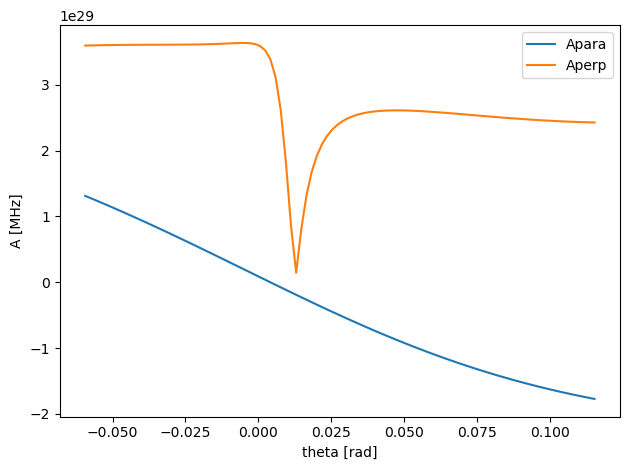

array([0.00000e+00, 0.00000e+00, 5.68685e-10])

In [44]:



ay = -0.57 * np.pi / 180
ax = -0.7 * np.pi / 180

thetas =  1.6 /360*2*np.pi + np.linspace(-5,5,100)*np.pi/180
phi_0 = 0.146 /360*2*np.pi
psi_0 = 0.368 /360*2*np.pi
index= 13
b0 = 436.917
Plot_hyperFine_for_site(thetas,b0,W_pos[index,1:]* 1e-10,phi_0,psi_0,site_index=index)
W_pos[9,1:]

In [3]:
get_HyperFine(W_pos[9,1:],b0,theta,phi_0,psi_0)



(array([0.00000e+00, 0.00000e+00, 5.68685e-10]),
 array([0.03910574, 0.12000016, 0.99200338]),
 array([[-0.30736569, -0.94318452,  0.12621132],
        [ 0.95078761, -0.30984339,  0.        ],
        [ 0.03910574,  0.12000016,  0.99200338]]),
 array([[ 0.30978791,  0.95061735, -0.01892365],
        [-0.95078761,  0.30984339,  0.        ],
        [ 0.00586337,  0.01799237,  0.99982093]]),
 np.float64(0.12929620011459447),
 np.float64(0.06330092603662935),
 array([[ 4.37800622e-01,  2.77555756e-17,  2.48766253e-02],
        [-5.55111512e-17,  4.41725292e-01, -8.67361738e-19],
        [-5.82079097e-02, -3.46944695e-18,  1.29296200e-01]]))